# Titanic Survival Prediction

## Importation des bibliothèques nécessaires

In [2]:
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd 
import numpy as np  
import warnings  
import tensorflow as tf 
from tensorflow.keras.models import Sequential # Importe le module Sequential de TensorFlow Keras
from tensorflow.keras.layers import Dense, Dropout # Importe les couches Dense et Dropout de TensorFlow Keras

## 1) Data acquisition
Download the data from this link : https://www.kaggle.com/c/titanic/data

In [4]:
# Charge le jeu de données d'entraînement 'train.csv' dans un DataFrame Pandas nommé 'df_train'
df_train = pd.read_csv('data/titanic/train.csv')

# Affiche les 5 premières lignes du DataFrame 'df_train' pour obtenir un aperçu des données
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId:** Un identifiant unique pour chaque passager.

**Survived:** Un indicateur sur le fait que le passager a survécu ou non au naufrage du Titanic (1 si le passager a survécu, 0 s'il est décédé).

**Pclass:** La classe de voyage du passager, allant de 1 à 3, où 1 représente la classe la plus élevée et 3 représente la classe la plus basse.

**Name:** Le nom complet du passager, y compris le nom de famille, le prénom et le titre.

**Sex:** Le sexe du passager, soit "male" (masculin) soit "female" (féminin).

**Age:** L'âge du passager en années.

**SibSp:** Le nombre de frères, sœurs ou conjoints à bord du Titanic pour le passager.

**Parch:** Le nombre de parents ou enfants à bord du Titanic pour le passager.

**Ticket:** Le numéro de billet du passager.

**Fare:** Le prix du billet du passager.

**Cabin:** Le numéro de cabine du passager (s'il y en a un).

**Embarked:** Le port d'embarquement du passager (C = Cherbourg, Q = Queenstown, S = Southampton).

## 2) Data description
Try to get the main information about the dataset

In [6]:
# Affichage des informations sur le jeu de données d'entraînement
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Affichage d'un résumé statistique du jeu de données d'entraînement
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3) Exploratory data analysis
For every data science project, the most important part is understanding the data.
Exploratory data anaylysis is an analysis approach that identifies general patterns in the data. Try to learn as much as you can about the dataset :

In [10]:
# TO-DO : Separate the dataset to 2 dataset : one for numerical data and one for categorical data

# Séparer l'ensemble de données en 2 ensembles de données : un pour les données numériques et un pour les données catégorielles.

# Liste des variables numériques du jeu de données d'entraînement
var_num = ['Age', 'Fare', 'SibSp', 'Parch']  

# Extraire les variables numériques du DataFrame 'df_train' et les stocker dans 'df_num'
df_num = df_train.loc[:, var_num]  

# Supprimer les variables numériques du DataFrame 'df_train' et stocker le reste dans 'df_cat', ensemble des variables catégorielles
df_cat = df_train.drop(var_num, axis=1)

### 3.1 ) Distributions des variables numériques

Text(0.5, 0.95, 'Histogramme des données numériques')

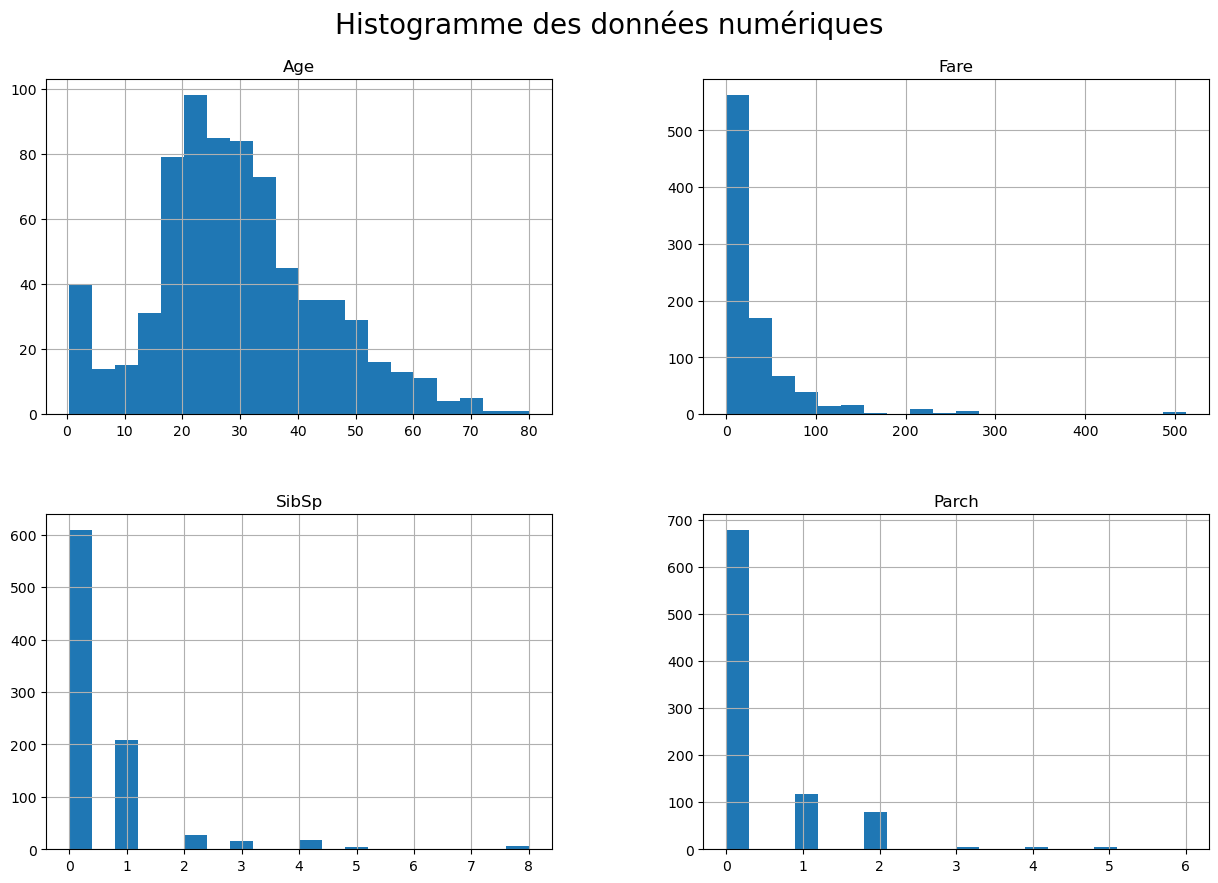

In [12]:
# TO-DO : Using matplotlib histograms, draw the distributions for numerical data

# Visualisation des distributions des variables numériques

# Affiche un histogramme des données numériques du DataFrame 'df_num', avec 20 classes d'intervalles
df_num.hist(bins=20, figsize=(15, 10)) 

# Ajoute un titre à l'histogramme
plt.suptitle("Histogramme des données numériques", y=0.95, fontsize=20)  

### 3.2 ) Matrice de corrélation

<Axes: >

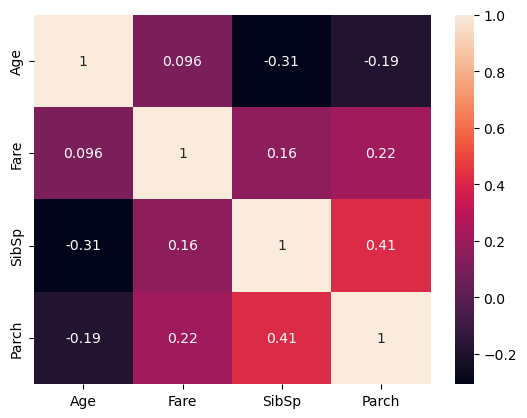

In [14]:
# TO-DO : Using seaborn, draw the heatmap for the correlation matrix and explain its role

# Calcul de la matrice de corrélation des données numériques du DataFrame 'df_num'
corr = df_num.corr()  

# Crée une carte de chaleur de la matrice de corrélation, avec les valeurs annotées
sns.heatmap(corr, annot=True)  

### 3.3 ) Pivot table des variables numériques

In [16]:
# TO-DO : 
    #Look up pivot tables in pandas and explain what they do
    # draw them for the numerical variables with a mean aggrregation

    
# Créer un pivot table avec les valeurs de l'âge (Age) et du prix de billet (Fare)
# en fonction du statut de survie (Survived). L'aggfunc="mean" calcule la moyenne
pivot_mean = pd.pivot_table(df_train, values=['Age', 'Fare'], index='Survived', aggfunc="mean")
print("Calcule moyen de l'âge (Age) et du prix de billet (Fare) en fonction du statut de survie (Survived)")
print(pivot_mean)
print()

# Crée un pivot table avec les valeurs du nombre de frères et soeurs (SibSp)
# et du nombre de parents (Parch) en fonction du statut de survie (Survived).
# L'aggfunc="count" calcule le nombre d'occurrences
pivot_count = pd.pivot_table(df_train, values=['SibSp', 'Parch'], index='Survived', aggfunc="count")
print("Calcule du nombre de frères et soeurs et du nombre de parents en fonction du statut de survie (Survived)")
print(pivot_count)

Calcule moyen de l'âge (Age) et du prix de billet (Fare) en fonction du statut de survie (Survived)
                Age       Fare
Survived                      
0         30.626179  22.117887
1         28.343690  48.395408

Calcule du nombre de frères et soeurs et du nombre de parents en fonction du statut de survie (Survived)
          Parch  SibSp
Survived              
0           549    549
1           342    342


## Moyen de l'âge (Age) et du prix du billet (Fare) en fonction du statut de survie (Survived):

Les moyennes d'âge pour les personnes qui n'ont pas survécu (Survived = 0) et celles qui ont survécu (Survived = 1) sont respectivement d'environ 30.63 ans et 28.34 ans.
En ce qui concerne le prix du billet, la moyenne pour les non-survivants est d'environ 22.12, tandis que pour les survivants, elle est nettement plus élevée, à environ 48.40.

## Nombre de frères et sœurs (SibSp) et de parents (Parch) en fonction du statut de survie (Survived):

Pour les non-survivants (Survived = 0), il y avait 549 personnes avec des parents (Parch) et 549 personnes avec des frères et sœurs (SibSp).
Pour les survivants (Survived = 1), il y avait 342 personnes avec des parents et 342 personnes avec des frères et sœurs.

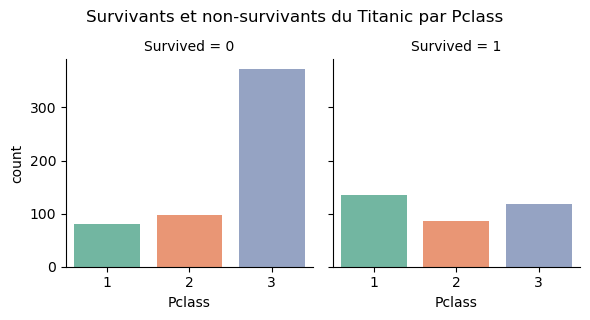

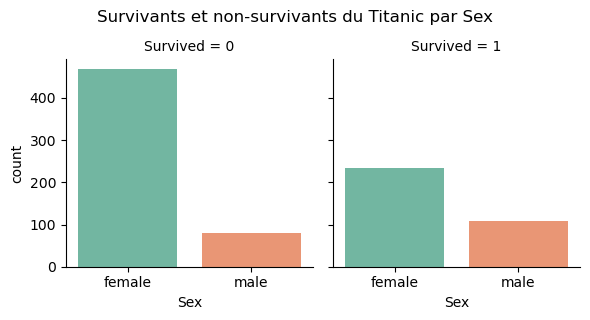

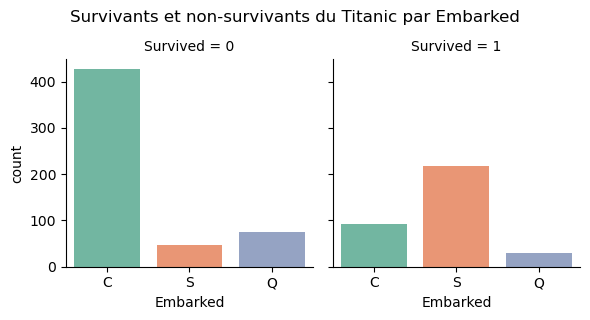

In [18]:
# TO-DO : Using sns barplot, draw the barplots for the categorical variables

# Ignorer tous les avertissements de type FutureWarning et UserWarning.
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

#  La méthode .iteritems() est obsolète et a été supprimée. Cette ligne permet d'éviter le bug.
pd.DataFrame.iteritems = pd.DataFrame.items

# Les variables PassengerId, Name, Ticket et Cabin sont des variables descriptives, c'est-à-dire qu'elles ne fournissent 
# aucune information sur la probabilité de survie des passagers du Titanic.
# Par conséquent, la représentation de ces variables est inutile, car elle ne fournit aucune information utile pour comprendre
# les facteurs qui ont influencé la survie des passagers du Titanic.

# Crée une liste des variables à visualiser
variables = [x for x in list(df_cat.columns) if x not in ["PassengerId", "Name", "Ticket", "Cabin", "Survived"]]

for variable in variables:
    # Crée un FacetGrid avec la variable `Survived` comme variable de facette
    g = sns.FacetGrid(df_cat, col="Survived")
    
    # Trace un diagramme à barres pour la variable `variable`
    g.map(sns.countplot, variable, palette="Set2")

    # Ajoute un titre au graphique
    g.fig.suptitle(f"Survivants et non-survivants du Titanic par {variable}", y=1.05)
    
    # Affiche le graphique
    plt.show()

### 3.4 ) Pivot table des variables catégorielles

In [20]:
# TO-DO : 
    # Create the pivot table for the categorical variables for which it makes sense
    # Explain why it doesn not make sense for the others

for variable in variables:
    # Crée une table de contingence avec les valeurs de la variable et le statut de survie (Survived)
    pivot_table = pd.crosstab(df_cat[variable], df_cat["Survived"])
    print(f"Survivants et non-survivants du Titanic par {variable}")
    # Affiche la table de contingence
    print(pivot_table)
    print()

Survivants et non-survivants du Titanic par Pclass
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survivants et non-survivants du Titanic par Sex
Survived    0    1
Sex               
female     81  233
male      468  109

Survivants et non-survivants du Titanic par Embarked
Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217



- **Premier pivot table :**
Cette pivot table montre la distribution de la classe sociale des passagers survivants et non survivants. On peut observer que les passagers de première classe avaient plus de chances de survivre que les passagers de deuxième classe, qui avaient eux-mêmes plus de chances de survivre que les passagers de troisième classe. Cette information suggère que la classe sociale était un facteur important de survie du naufrage du Titanic.
- **Deuxieme Pivot table:**
Cette distribution montre la distribution des suivivant et non-suivivants du Titanic par Sex. On remarque le nombre mort chez les femmes est inferieur au nombre de mort chez les hommes, celà explique les femmes etaient favorisées que les les hommes.

- **Toisième pivot table :**
Cette pivot table montre la distribution du port d'embarquement des passagers survivants et non survivants.
On peut observer que les passagers qui ont embarqué à Cherbourg avaient plus de chances de survivre que 
les passagers qui ont embarqué à Southampton ou à Queenstown. Cette information suggère que le port d'embarquement était également un facteur important de survie du naufrage du Titanic.

In [23]:
# TO-DO : 
    # Explore the variable Cabin's values
    # Can we use this variable directly? if not, how can we exploit it efficiently

# Affiche le nombre de valeurs manquantes dans la variable Cabine
print(f"Il y a {df_cat['Cabin'].isnull().sum()} valeurs manquantes")

# Affiche le nombre de valeurs uniques de la variable Cabine
print(f"Il y a {len(df_cat['Cabin'].unique())} valeurs uniques", end="\n\n")
    
# Affiche la distribution des valeurs de la variable Cabine
print(df_cat["Cabin"].value_counts())

Il y a 687 valeurs manquantes
Il y a 148 valeurs uniques

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64


**Exploration de la variable Cabine**

La variable Cabine dans le jeu de données Titanic contient le numéro de cabine de chaque passager. Cependant, cette variable est très incomplète, avec 687 valeurs manquantes. Cela rend difficile l'utilisation directe de la variable Cabine pour l'analyse.

Voici quelques-uns des défis liés à l'utilisation directe de la variable Cabine :

* **Valeurs manquantes** : Comme mentionné ci-dessus, plus de 75 % des valeurs de la variable Cabine sont manquantes. Cela signifie que nous ne pouvons pas utiliser la variable pour toute analyse qui nécessite toutes les données.
* **Données non structurées** : La variable Cabine est des données non structurées, ce qui signifie qu'elle n'est pas dans un format qui peut être facilement analysé par des algorithmes d'apprentissage automatique. Cela rend difficile l'extraction d'informations utiles des données.

**Comment exploiter efficacement la variable Cabine**

**Créer de nouvelles fonctionnalités** : Nous pouvons créer de nouvelles fonctionnalités à partir de la variable Cabine, telles que le niveau du pont, le nombre de lettres dans le numéro de cabine ou la présence de lettres spécifiques dans le numéro de cabine. Ces nouvelles fonctionnalités peuvent être plus utiles pour l'analyse que la variable Cabine d'origine.

## 4) Data Engineering
When exploiting datasets, data engineering is an important preprocessing step. Its goal is to extract more information from the data so to increase the predictive power of the machine learning model.
Identify some variables on which we can apply data engineering and explain what type of information can be extratced from them.

### 4.1 ) Création d'une nouvelle variable `Cabin_multiple`

In [25]:
# Here is an example of data engineering from the variable Cabin, we used it to create a new 
# variable called Cabin_multiple that contains the number of cabins per passenger.
df_train['Cabin_multiple'] = df_train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train['Cabin_multiple'].value_counts()

Cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

### 4.2 ) Création de la pivot table de la variable `Cabin_multiple`

In [27]:
# TO-DO : Create the pivot table for the newly created attribute.
# Créé une table pivot pour la variable Cabin_multiple
pivot_table = df_train.pivot_table(values='Survived', index='Cabin_multiple', aggfunc=sum)
print(pivot_table)

                Survived
Cabin_multiple          
0                    206
1                    122
2                      9
3                      3
4                      2


Cette table pivot montre que les passagers qui occupaient une seule cabine avaient plus de chances de survivre que les passagers qui occupaient plusieurs cabines.

### 4.3 ) Création de nouvelles variables utiles

In [29]:
# TO-DO : Create the variables you think might be interesting then draw the pivot tables for the variables you create

# Cette variable représente la taille de la famille du passager.On la calcule en additionnant le nombre de frères 
# et sœurs (SibSp) et le nombre de parents (Parch) du passager, auquel on ajoute 1 pour le passager lui-même.
# Cette information peut être utile pour comprendre la priorité accordée aux passagers lors de l'évacuation du navire.
df_train['Family_size'] = df_train.SibSp + df_train.Parch + 1

# Créé une table pivot pour la variable Cabin_multiple
pivot_table = df_train.pivot_table(values='Survived', index='Family_size', aggfunc=sum)
pivot_table

,Survived
Family_size,
1,163
2,89
3,59
4,21
5,3
6,3
7,4
8,0
11,0


In [31]:
# Cette variable représente la première lettre de la cabine du passager.
# Elle peut être utile pour comprendre la localisation de la cabine du passager.
df_train['Cabin_letter'] = df_train.Cabin.str[0]

# Créé une table pivot pour la variable Cabin_letter
pivot_table = df_train.pivot_table(values='Survived', index='Cabin_letter', aggfunc="count")
pivot_table

,Survived
Cabin_letter,
A,15
B,47
C,59
D,33
E,32
F,13
G,4
T,1


Ces nouvelles variables peuvent contribuer à améliorer la puissance de prédiction du modèle des survivants du Titanic. Elles capturent des informations supplémentaires sur les passagers qui peuvent être utiles pour comprendre les facteurs qui ont influencé leur survie.

Attention : ces variables ne sont pas garanties d'améliorer la puissance de prédiction du modèle. Il est nécessaire de tester les modèles sur des données de validation pour confirmer leur efficacité.

## 5) Data Preperation
All of the operations done so far were done on the training set. However, when we test our model, the test data needs to have the same format as the training data (the created variables, the deleted variables, ...).

### 5.1) Data transformation:
A quick way to do that, is to combine both datasets and apply the operations applied previously on the combined dataset.

In [33]:
df_test = pd.read_csv('data/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### 5.1.1 ) Combinaison de l'ensemble de d'apprentissage et de test

In [35]:
# Ce code combine les ensembles d'entraînement et de test du dataset Titanic et ajoute une colonne 
# supplémentaire train pour indiquer si un enregistrement provient de l'ensemble d'entraînement ou de l'ensemble de test.

# Ajoute une colonne train à l'ensemble d'entraînement df_train et lui attribue la valeur 1 pour tous les enregistrements. 
# Cette valeur servira à différencier les enregistrements de l'ensemble d'entraînement des enregistrements de l'ensemble de 
# test lors de l'application des transformations ou du calcul des statistiques.
df_train['train'] = 1

# Ajoute également une colonne train à l'ensemble de test df_test et lui attribue la valeur 
# 0 pour tous les enregistrements. Cette valeur indique que les enregistrements de l'ensemble de test ne sont 
# pas inclus dans l'ensemble d'entraînement et qu'ils doivent être traités différemment lors de la construction du modèle.
df_test['train'] = 0

# Cette ligne assigne la valeur np.NaN (NaN = Not a Number) à la colonne Survived pour tous les 
# enregistrements de l'ensemble de test. Cette valeur indique que les informations sur la survie des 
# passagers de l'ensemble de test ne sont pas disponibles, car il s'agit d'enregistrements non observés.
df_test['Survived'] = np.NaN

# Combine les deux ensembles de données en un seul ensemble df_all.
# les deux ensembles sont joins en ajoutant les enregistrements de l'ensemble de test après les enregistrements
# de l'ensemble d'entraînement.
df_all = pd.concat([df_train, df_test])

#  Affiche les 5 premiers enregistrements de l'ensemble combiné df_all.
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiple,Family_size,Cabin_letter,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,2.0,NaN,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,2.0,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,NaN,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,2.0,C,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,NaN,1


#### 5.1.2) Ajout des variables créées au jeu de données de test

In [37]:
# On remplace les valeurs manquantes du jeu de test des variables créées en utilisant le même 
# calcul que pour le jeu d'entraînement.

# Cabin_multiple
df_all['Cabin_multiple'] = df_all['Cabin_multiple'].fillna(
    df_train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' '))))

# Family_size
df_all['Family_size'] = df_all['Family_size'].fillna(df_train.SibSp + df_train.Parch + 1)

# Cabin_letter
df_all['Cabin_letter'] = df_all['Cabin_letter'].fillna(df_train.Cabin.str[0])

#### 5.1.2) Information sur l'ensemble du jeu de données

In [39]:
# TO-DO : Use the .info() function from pandas and get the information about the dataset after the changes
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1046 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1308 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  Cabin_multiple  1309 non-null   float64
 13  Family_size     1309 non-null   float64
 14  Cabin_letter    296 non-null    object 
 15  train           1309 non-null   int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 173.9+ KB


#### 5.1.2) Imputaton des variables `Age` et `Fare`

In [41]:
# Remplace les valeurs manquantes dans les colonnes Age et Fare de l'ensemble de 
# données df_all par la médiane de la colonne respective.
df_all['Age'] = df_all['Age'].fillna(df_all['Age'].median())
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].median())

### 5.2) Handling missing data : 
There are different ways to handle missing data in a dataset. Name some of them.

List the variables with missing values.

For every variable named, handle the missing variables in the way you see fits.

#### 5.2.1) Méthodes de gestion des valeurs manquantes

Il existe deux grandes approches pour gérer les données manquantes : la suppression et l'imputation.

**La suppression** consiste à éliminer les observations ou les variables contenant des valeurs manquantes. Cette approche est simple à mettre en œuvre, mais elle peut entraîner une perte de données importantes et une diminution de la puissance statistique du modèle.

**L'imputation** consiste à remplacer les valeurs manquantes par des valeurs estimées. Cette approche permet de conserver l'ensemble des données, mais elle peut entraîner une introduction de biais dans le modèle, si les valeurs estimées ne sont pas représentatives des valeurs réelles.

Plusieurs méthodes d'imputation existent, dont les suivantes :

* **La substitution par la moyenne ou la médiane** : les valeurs manquantes sont remplacées par la moyenne ou la médiane des valeurs observées pour la variable considérée.
* **La substitution par une valeur constante** : les valeurs manquantes sont remplacées par une valeur constante, telle que 0 ou une valeur moyenne.
* **L'imputation par régression** : les valeurs manquantes sont estimées à l'aide d'un modèle de régression. Cette méthode permet de prendre en compte les relations entre les variables.
* **L'imputation par machine learning** : les valeurs manquantes sont estimées à l'aide d'un modèle d'apprentissage automatique. Cette méthode permet de prendre en compte des relations complexes entre les variables.

#### 5.2.2 ) Information sur l'ensemble du jeu de données

In [43]:
# TO-DO : Use the .info() function from pandas and get the information about the dataset after the changes
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   object 
 5   Age             1309 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1309 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1307 non-null   object 
 12  Cabin_multiple  1309 non-null   float64
 13  Family_size     1309 non-null   float64
 14  Cabin_letter    296 non-null    object 
 15  train           1309 non-null   int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 173.9+ KB


#### 5.2.3 ) Liste des variables avec valeurs manquantes et la stratégie adopté

- **Survived, Cabin, Embarked** sont les variables categorielles avec des valeurs manquantes.
- **Suvived** : les valeurs manquantes seront conservées car elles sont importantes pour le jeu de test.
- **Cabin** et **Cabin_letter**: les variables seront supprimées car il y a environ 77 % de données manquantes.
- **Embarked** : les lignes avec des données manquantes pour cette variable seront supprimées car 99 % des données sont disponibles.

In [45]:
#supprimer 'Cabin' Si la colonne elle existe dans le DataFrame 'df_all', supprimez-la
if "Cabin" in df_all.columns:
    df_all = df_all.drop("Cabin", axis=1)
    
if "Cabin_letter" in df_all.columns:
    df_all = df_all.drop("Cabin_letter", axis=1)

# Supprimez les lignes contenant des valeurs manquantes dans la colonne 'Embarked'
df_all = df_all.dropna(subset=['Embarked'])

# Imprimez les informations du DataFrame 'df_all' modifié
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Embarked        1307 non-null   object 
 11  Cabin_multiple  1307 non-null   float64
 12  Family_size     1307 non-null   float64
 13  train           1307 non-null   int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 153.2+ KB


### 5.3) Categorical variables transformation : 
Fully connected neural networks (FCNNs) are known for not being able to handle categorical variables in their natural state.

Using one hot encoding (.get dummies function from pandas), create a new version of the dataset with transformed categorical variables.

#### 5.3.1 ) Encodage des variables catégorielles

In [47]:
# First, we transoform the Pclass variable to string because it is a categorical variable

# Convertir le type de données de la colonne 'Pclass' en chaîne de caractères
# Cela est nécessaire car le codage à chaud ne fonctionne pas avec les données numériques.
df_all['Pclass'] = df_all['Pclass'].astype(str)

# Obtenir la liste des noms de colonnes catégorielles
column_name = list(df_cat.columns.array)

# Supprimer les colonnes "Cabin", "PassengerId", "Name" et "Survived" de la liste des colonnes catégorielles
# Ces colonnes ne sont pas pertinentes pour la prédiction de la survie et ne doivent pas être utilisées dans le codage à chaud.
column_name.remove("Cabin")
column_name.remove("PassengerId")
column_name.remove("Name")
column_name.remove("Survived")

# Convertir les types de données des colonnes catégorielles en chaînes de caractères
# Cela permet d'appliquer le codage à chaud efficacement.
df_all[column_name] = df_all[column_name].astype(str)

# Encode les variables catégorielles à l'aide du codage à chaud
df_all_new = pd.get_dummies(df_all, columns=column_name, dtype="int64")

# Afficher les cinq premières lignes du DataFrame 'df_all_new'
df_all_new.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Cabin_multiple,Family_size,train,...,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0.0,2.0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1.0,2.0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1.0,2.0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,"Allen, Mr. William Henry",35.0,0,0,8.0500,0.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1


L'encodage à chaud a permit d'obtenir 947 fonctionalitées

#### 5.3.2 ) Informations les nouvelles données

In [59]:
# TO-DO : Get the information for the newly created dataset
df_all_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Columns: 946 entries, PassengerId to Embarked_S
dtypes: float64(5), int64(940), object(1)
memory usage: 9.4+ MB


In [61]:
df_all_new.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_multiple,Family_size,train,Pclass_1,...,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
count,1307.000000,889.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,...,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,655.319816,0.382452,29.471821,0.499617,0.385616,33.209595,0.263963,1.927314,0.680184,0.245601,...,0.000765,0.003060,0.003826,0.000765,0.001530,0.000765,0.001530,0.206580,0.094109,0.699311
std,377.922205,0.486260,12.881592,1.042273,0.866092,51.748768,0.547815,1.641278,0.466584,0.430608,...,0.027661,0.055258,0.061756,0.027661,0.039103,0.027661,0.039103,0.405006,0.292092,0.458733
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.500000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,982.500000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329200,4.000000,11.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5.3.3 ) Suppression des variables créées dans le nouvel ensemble de données

In [63]:
# TO-DO : Create a second version of the dataset from the one previously created but without the 
# variables you created with data engineering

# Supprime les colonnes "Cabin_multiple" et "Family_size" du DataFrame 'df_all_new_2'
df_all_new_2 = df_all_new.drop(["Cabin_multiple", "Family_size"], axis=1)

#### 5.3.4 ) Suppression des variables `PassengerId` et `Name`

In [65]:
# Supprime les colonnes "PassengerId" et "Name" du DataFrame "df_all_new_2"
df_all_new_2 = df_all_new.drop(["PassengerId", "Name"], axis=1)

#### 5.3.5 ) Séparation du jeu de données réel en train et test

In [67]:
# TO-DO : Separate the training data from the test data

# Supprime les lignes contenant des valeurs manquantes dans la colonne "Embarked"
df_train = df_train.dropna(subset=['Embarked'])

# Sélectionne les données d'entraînement pour le modèle (train == 1)
X_train = df_train.query("train == 1").drop("Survived", axis=1)

# Sélectionne les données de test pour l'évaluation du modèle (train == 0)
X_test = df_train.query("train == 0").drop("Survived", axis=1)

# Extrait la variable cible (Survived) des données d'entraînement
Y_train = df_train.query("train == 1")["Survived"]  # .astype(int)

# Affiche la forme des matrices de données d'entraînement et de test
print(X_train.shape, Y_train.shape)
print(X_test.shape)

(889, 15) (889,)
(0, 15)


#### 5.3.6 ) Séparation du jeu de données tranformé en train et test

In [69]:
# TO-DO : Separate the training data from the test data for the dataset without variables that are feature engineered

# Récupère les données d'entraînement et de test à partir du DataFrame 'df_all_new_2'
X_train_bis = df_all_new_2.query("train == 1").drop("Survived", axis=1)
X_test_bis = df_all_new_2.query("train == 0").drop("Survived", axis=1)

# Supprime la variable train unitile pour la formation du moèle
X_train_bis = X_train_bis.drop("train", axis=1)
X_test_bis = X_test_bis.drop("train", axis=1)

# Affiche la forme des matrices de données d'entraînement et de test
print(X_train_bis.shape, Y_train.shape)
print(X_test_bis.shape)

(889, 942) (889,)
(418, 942)


## 6) Model Creation
Using keras, create a Neural Network and train it on the data generated. 

### 6.1 Création et entraînement du modèle

In [71]:
# TO-DO : Model creation
# Crée un objet modèle séquentiel
model = Sequential()

# Ajoute une première couche Dense avec 10 unités et activation ReLU
model.add(Dense(10, activation="relu", input_shape=(X_train_bis.shape[1],)))

# Ajoute une deuxième couche Dense avec 5 unités et activation ReLU
model.add(Dense(5, activation="relu"))

# Ajoute une troisième couche Dense avec une unité et activation Sigmoïde pour la classification binaire 
# (Survécu/N'a pas survécu)
model.add(Dense(1, activation="sigmoid"))

# TO-DO : Model training
# Configure le modèle pour l'optimisation par descente de gradient stochastique (SGD) avec l'optimiseur 
# Adam et la fonction de perte de cross-entropy binaire
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entraîne le modèle pendant 100 époques sur les données d'entraînement X_train_bis et Y_train
model.fit(X_train_bis, Y_train, epochs=100)



Epoch 1/100


28/28 [==============================] - 2s 5ms/step - loss: 0.6679 - accuracy: 0.6850
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.6315 - accuracy: 0.7075
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6098 - accuracy: 0.7087
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.7278
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5564 - accuracy: 0.7255
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5401 - accuracy: 0.7458
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7593
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5014 - accuracy: 0.7548
Epoch 9/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4879 - accuracy: 0.7784
Epoch 10/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.7987
Epoch

### 6.2 Évaluation du modèle sur les données de test

In [73]:
# This code transforms the results to binary (0 or 1) from the probabilities predicted by the model

# Réalise les prédictions sur les données de test X_test_bis
pred_val = model.predict(X_test_bis)

# Convertit les prédictions en valeurs binaires (0 ou 1)
pred_val = (pred_val > 0.5).astype(int).flatten()

# Affiche la longueur des prédictions
len(pred_val)

14/14 [==============================] - 0s 5ms/step


418

### 6.3 Formation des résultats et préparation du fichier de sortie

In [75]:
# This code formats the results to a submission format (Call the lab assistant to learn more about this !)

# Crée un DataFrame avec les colonnes "PassengerId" et "Survived"
formated_results = {'PassengerId' : df_test['PassengerId'], 'Survived' : pred_val}

# Transforme le dictionnaire en DataFrame pandas
formated_results = pd.DataFrame(formated_results)

# Affiche les cinq premières lignes du DataFrame
formated_results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 6.4 Sauvegarde des résultats dans un fichier CSV

In [77]:
# Saving the results in a csv file
# Sauvegarde le DataFrame formated_results dans un fichier CSV nommé "results.csv"
formated_results.to_csv('data/titanic/results.csv', index = False)